<a href="https://colab.research.google.com/github/Eliokay/Binary-Image-Classification/blob/main/Image_Classification_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

For this project, I will set up and train a Convolusional Neural Network that will classify thousands of images into one of two categories: Cats or Dogs.

## Import libraries

In [ ]:
pip install keras


In [ ]:
pip install tensorflow

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
import random
from keras.losses import binary_crossentropy

## Load clean data

I am using a dataset that I found on Github -https://github.com/Coding-Lane/Image-Classification-CNN-Keras/blob/main/README.md . This is a Keras dataset that has already been split into training and testing. For each, it is further divided into two datasets that contain the images in one and the labels to the images in the other.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
X_train = np.loadtxt('/content/drive/MyDrive/input.csv', delimiter = ',')
y_train = np.loadtxt('/content/drive/MyDrive/labels.csv', delimiter = ',')

X_test = np.loadtxt('/content/drive/MyDrive/input_test.csv', delimiter = ',')
y_test = np.loadtxt('/content/drive/MyDrive/labels_test.csv', delimiter = ',')

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2000, 30000)
(2000,)
(400, 30000)
(400,)


##Reshaping

Images need to be reshaped to match the input size expected by the neural network architecture, ensuring that the network can process the image data correctly during training and inference.

In [ ]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
y_train = y_train.reshape(len(y_train), 1)
X_test = X_test.reshape(len(X_test), 100, 100, 3)
y_test = y_test.reshape(len(y_test), 1)


In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2000, 100, 100, 3)
(2000, 1)
(400, 100, 100, 3)
(400, 1)


##Rescaling values between 0-1

Images need to be rescaled to normalize the pixel values to a consistent range (typically 0 to 1), which helps improve the numerical stability and convergence during the training process of neural networks.

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

##Dislplay Image to explore dataset

I want to see how a random image from this dataset looks

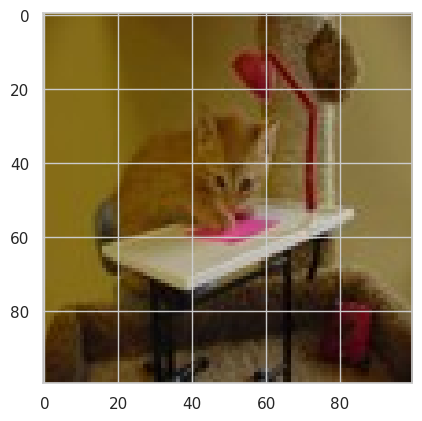

In [ ]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
#plt.show()

I also want to know what 0 and 1 represents in this dataset. This would be helpful later to explain my confusion matrix

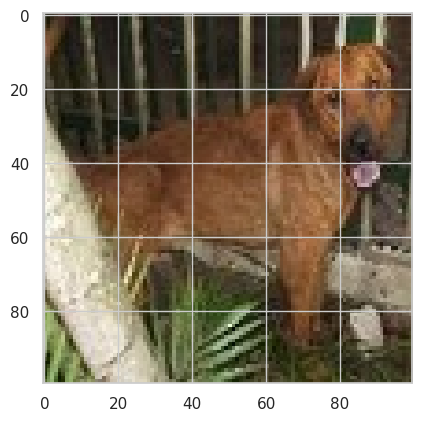

In [ ]:
#this prints out the first image in the dataset
plt.imshow(X_train[0, :])

In [ ]:
#this gives the label of that corresponds with the first image in the dataset
y_train[0]

array([0.])

This tells me that 0 is for dogs and 1 is for cats.

##Building our Model

I will be building a Convolusional Neural Network.

In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D(2,2),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(loss = binary_crossentropy, optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs = 10, batch_size = 64)

Epoch 1/10
32/32 [==============================] - 31s 932ms/step - loss: 0.8014 - accuracy: 0.5115
Epoch 2/10
32/32 [==============================] - 31s 968ms/step - loss: 0.6872 - accuracy: 0.5880
Epoch 3/10
32/32 [==============================] - 36s 1s/step - loss: 0.6403 - accuracy: 0.6490
Epoch 4/10
32/32 [==============================] - 23s 708ms/step - loss: 0.5655 - accuracy: 0.7175
Epoch 5/10
32/32 [==============================] - 23s 693ms/step - loss: 0.4963 - accuracy: 0.7675
Epoch 6/10
32/32 [==============================] - 24s 757ms/step - loss: 0.4314 - accuracy: 0.8055
Epoch 7/10
32/32 [==============================] - 25s 777ms/step - loss: 0.3651 - accuracy: 0.8370
Epoch 8/10
32/32 [==============================] - 27s 838ms/step - loss: 0.3118 - accuracy: 0.8665
Epoch 9/10
32/32 [==============================] - 25s 733ms/step - loss: 0.2240 - accuracy: 0.9145
Epoch 10/10
32/32 [==============================] - 23s 723ms/step - loss: 0.1697 - accuracy:

I used an epochs of 10 to produce a much more accurate model.

##Evaluating Model performance on the Test data

In [ ]:
model.evaluate(X_test, y_test)

13/13 [==============================] - 2s 132ms/step - loss: 0.8368 - accuracy: 0.6650


[0.8367578983306885, 0.6650000214576721]

This indicates that the model achieved a test loss of 0.7325 and a test accuracy of 67.75% on the given dataset, suggesting that there is room for improvement in its performance.

##Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
# Convert the predictions to binary values (0 or 1)
y_pred_binary = [int(round(p[0])) for p in y_pred]
cm = confusion_matrix(y_test, y_pred_binary)
print(cm)


13/13 [==============================] - 1s 94ms/step
[[129  71]
 [ 63 137]]


116 images were correctly classified as dogs (true positives)
84 images were incorrectly classified as cats (false negatives)
45 images were incorrectly classified as dogs (false positives)
155 images were correctly classified as cats (true negatives)

The total accuracy of this model[ (116 + 155) / (116 + 84 + 45 + 155) ] is 68.5%.


##Further Analysing where the model went wrong

In [ ]:
idxpred = y_test.squeeze() != np.array(y_pred_binary).squeeze()


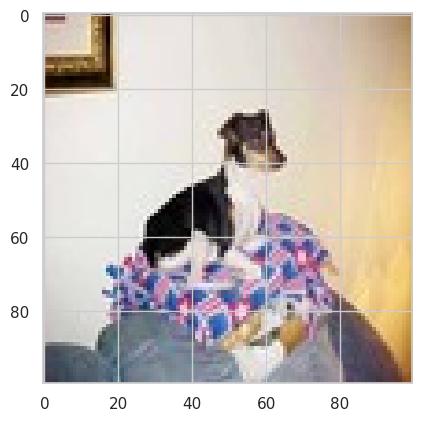

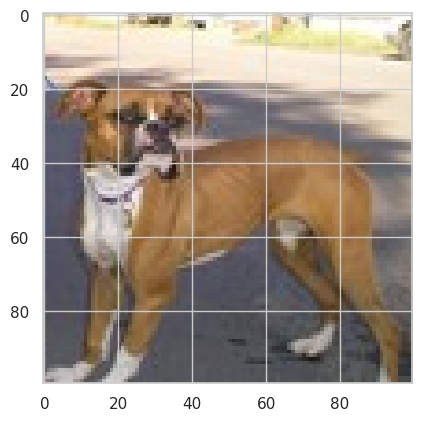

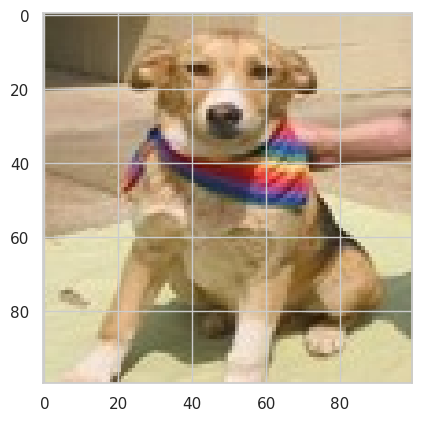

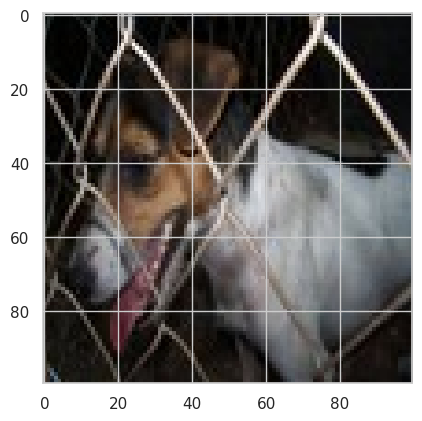

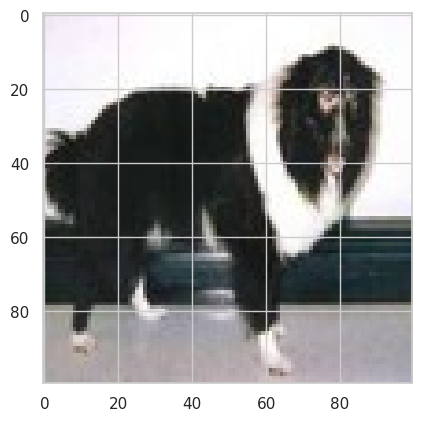

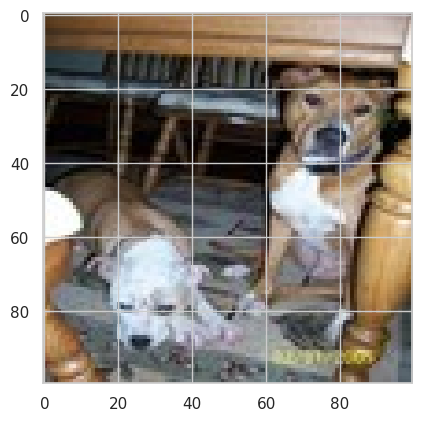

In [ ]:
#this code prints out 5 images that were wrongly predicted
k=0
for i in range(len(idxpred)):
  if k > 5:
    break
  if idxpred[i] == True:
    k=k+1
    plt.figure(i)
    plt.imshow(X_test[i, :])


There isn't a clear pattern/ reason as to why the model mistook these images as cats. Howeever, some of the images have additional elements that could throw the model off

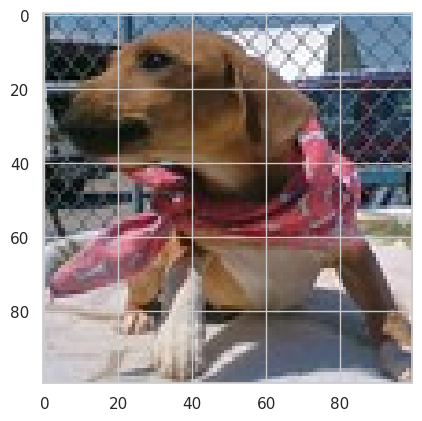

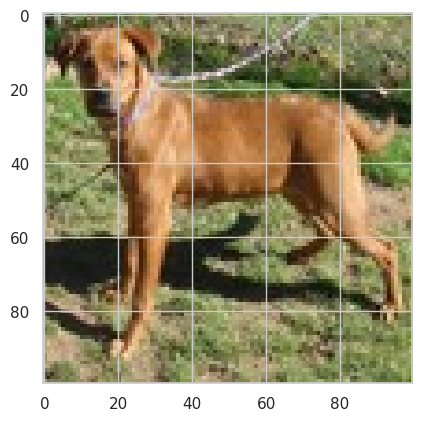

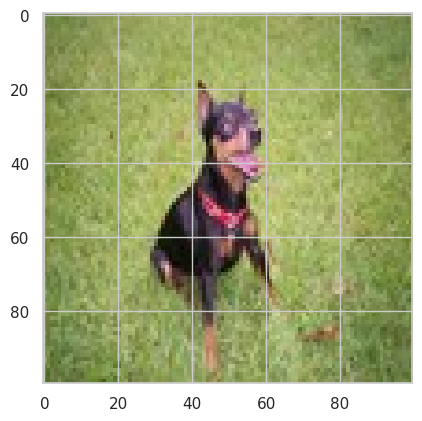

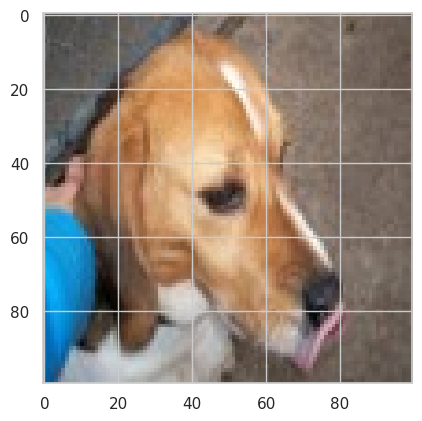

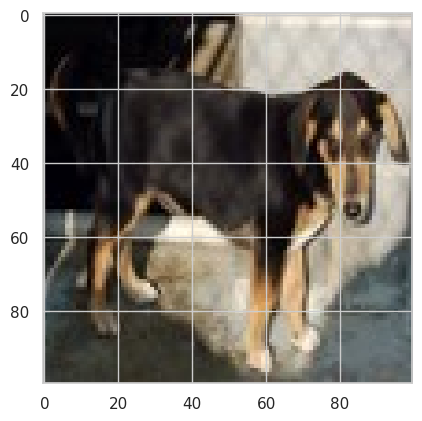

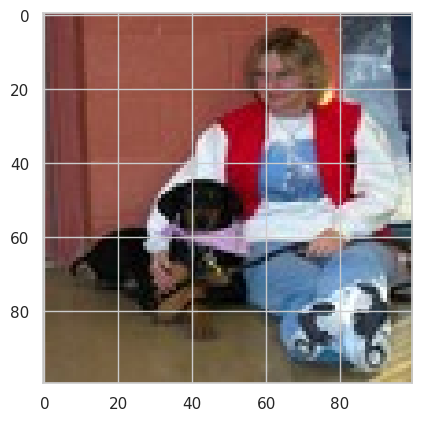

In [ ]:
#This code displays 5 images that were correctly predicted by the model
k=0
for i in range(len(idxpred)):
  if k > 5:
    break
  if idxpred[i] == False:
    k=k+1
    plt.figure(i)
    plt.imshow(X_test[i, :])


These images also have extra elements like the previous ones. This suggests that more training needs to be done on this CNN.